# Caution 

1) If reaction names and specie names (or maybe Id) are same for two reaction, they are combined. Remember to change the reaction name before combining models if you want same reactions to be present (even for different compartments).

2) Do not change the membrane model and the external subsystem model. The ones that I have listed should be there. Add new models in the respective ListOfSubsystems according to mechanism you want to achieve.

3) Change internal subsystem of cells (cell_2 and cell_3) to be fused according to the objective you want to achieve. 

4) Remeber to check the sbml file of generated model to verify if things are correct.

5) I am printing result 1 and 2 inorder to check if fusion occur at right time, specie concentration are set correctly



In [1]:
from biocrnpyler import *
import numpy as np
import pylab as plt
from subsbml import *
import libsbml
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

# Make individual cell model

In [2]:
ss1 = createSubsystem('Models/Export_transporter_cell1.xml')
ss2 = createSubsystem('Models/atc_external_reservoir.xml')
#ssext= createSubsystem('Models/dnaStrand_fusion_export.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('Models/atc_membrane_export.xml', membrane = True)

mb2 = createSubsystem('Models/dnaexp_membrane1.xml', membrane = True)

cell_1 =  System('cell_1',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1,mb2])

cell_1_model = cell_1.getModel()
cell_1_model.renameCompartments('cell_1_external', 'cell_external')
cell_1_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 
#cell_1_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-10) 
cell_1_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_1_model.setSpeciesConcentration('ssDNA', 50, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('dna_g', 1, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('tetR', 10, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('ATP', 15, compartment = 'cell_1_internal')


cell_1_model.writeSBML('Models/m2Dnaexp_cell.xml')

The subsystem from Models/atc_membrane_export.xml has multiple compartments
The subsystem from Models/dnaexp_membrane1.xml has multiple compartments


1

In [3]:
ss3 = createSubsystem('Models/fusion_sub1.xml')
mb3 = createSubsystem('Models/atc_membrane_cell2.xml', membrane = True)
cell_2 =  System('cell_2',ListOfInternalSubsystems = [ss3],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb3])

cell_2_model = cell_2.getModel()
#cell_2_model.renameSName('atc_i', 'atc_i_cell2')
cell_2_model.renameCompartments('cell_2_external', 'cell_external')
cell_2_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-4) 
#cell_2_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-10) 

cell_2_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_2_model.setSpeciesConcentration('ssDNA_comp1', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('dna_f', 1, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('tetR', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('ATP', 10, compartment = 'cell_2_internal')


cell_2_model.writeSBML('Models/m2fusion_cell1.xml')

The subsystem from Models/atc_membrane_cell2.xml has multiple compartments


1

In [4]:
ss5 = createSubsystem('Models/fusion_sub2.xml')
mb4 = createSubsystem('Models/atc_membrane_cell3.xml', membrane = True)
cell_3 =  System('cell_3',ListOfInternalSubsystems = [ss5],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb4])

cell_3_model = cell_3.getModel()

cell_3_model.renameCompartments('cell_3_external', 'cell_external')
cell_3_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-4) 
#cell_3_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-10) 

cell_3_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_3_model.setSpeciesConcentration('ssDNA_comp2', 10, compartment = 'cell_3_internal')
cell_3_model.setSpeciesConcentration('dna_h', 1, compartment = 'cell_3_internal')
cell_3_model.setSpeciesConcentration('ATP', 15, compartment = 'cell_3_internal')

cell_3_model.writeSBML('Models/m2fusion_cell2.xml')


The subsystem from Models/atc_membrane_cell3.xml has multiple compartments


1

In [5]:
system2 = createNewSubsystem() 
system2.combineSubsystems([cell_1_model, cell_2_model, cell_3_model], verbose=True)
system2.writeSBML('Models/m2system2.xml')
combmod2=system2.getSBMLDocument().getModel()
combinemodel2=SimpleModel(combmod2)
combinemodel2.createNewSpecies(ListOfSpecies = ['dsDNA'],sComp = 'cell_external_combined', ListOfAmounts = [0], 
                             sConstant = False)
combinemodel2.createNewParameter(ListOfParameters = ['kf','kre'],
                               ListOfValues = [100, 1e-7],
                               pConstant = False, pUnit = 'per_second')
combinemodel2.createSimpleReaction(rId = 'raa1',rStr = 'ssDNA_comp1 + ssDNA_comp2 + ssDNA_e <-> dsDNA',
                                 rRate = 'kf * ssDNA_comp1 * ssDNA_comp2 * ssDNA_e - kre * dsDNA',
                                 isConstant = False)

system2.writeSBML('Models/m3system32.xml')


C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:646: UserWarning: Not all of the Subsystems being combined are in the same Compartment
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=0.0002  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=2e-09  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=4e-05  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=1e-12  </PropensityType>
C:\Users\Agrima\anaconda3\lib\sit

1

In [7]:
system2.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
system2.setSpeciesConcentration('ssDNA', 50, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('dna_g', 1, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('tetR', 10, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('ATP', 15, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('ssDNA_comp1', 10, compartment = 'cell_2_internal')
system2.setSpeciesConcentration('dna_f', 1, compartment = 'cell_2_internal')
system2.setSpeciesConcentration('tetR', 10, compartment = 'cell_2_internal')
system2.setSpeciesConcentration('ATP', 10, compartment = 'cell_2_internal')
system2.setSpeciesConcentration('ssDNA_comp2', 10, compartment = 'cell_3_internal')
system2.setSpeciesConcentration('dna_h', 1, compartment = 'cell_3_internal')
system2.setSpeciesConcentration('ATP', 15, compartment = 'cell_3_internal')
system2.writeSBML('Models/m3system32.xml')

1

C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


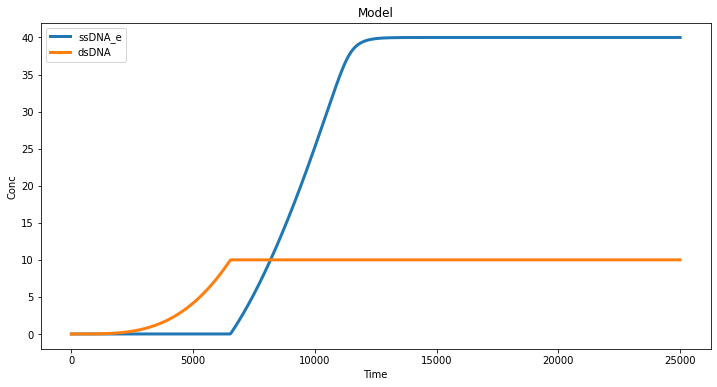

In [8]:
timepoints = np.linspace(0,25000,1000)
result1, _ = system2.simulateWithBioscrape(timepoints)
ssDNA_e_id1 = system2.getSpeciesByName('ssDNA_e', compartment = 'cell_external').getId()
dsDNA_id2 =system2.getSpeciesByName('dsDNA').getId()
vire2b_id2 =system2.getSpeciesByName('VirE2_b').getId()
plt.figure(figsize=(12,6))
plt.plot(timepoints, result1[ssDNA_e_id1], linewidth = 3, label = 'ssDNA_e')
plt.plot(timepoints, result1[dsDNA_id2], linewidth = 3, label = 'dsDNA')
plt.title("Model")
plt.xlabel('Time')
plt.ylabel('Conc')
plt.legend()
plt.show()

In [9]:
%run myfusion.py

In [10]:
fused_cell,r1,t1,r2,t2= triggeredFusion ( [system2], [cell_2_model, cell_3_model], "dsDNA", ">", 1, timepoints)

C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


In [11]:
print(r1)

     atc_e_external_reservoir_model_1_combined  ssDNA_comp1  \
0                                 10000.000000         10.0   
1                                  9511.878637         10.0   
2                                  9047.702150         10.0   
3                                  8606.295704         10.0   
4                                  8186.542402         10.0   
..                                         ...          ...   
128                                  65.611058         10.0   
129                                  64.830596         10.0   
130                                  64.088420         10.0   
131                                  63.382652         10.0   
132                                  62.711507         10.0   

     dna_f_biocrnpyler_844781  tetR_biocrnpyler_844781  \
0                    1.000000             1.000000e+01   
1                    0.999904             8.842745e+00   
2                    0.999828             6.167939e+00   
3          

In [12]:
r2

,ssDNA_comp1,dna_f_biocrnpyler_844781,tetR_biocrnpyler_844781,rna_f_biocrnpyler_844781,atc_i_cell2_1_combined,complex_atc_i_cell2_tetR_biocrnpyler_844781,complex_dna_f_tetR_biocrnpyler_844781,complex_atc_i_cell2_dna_f_tetR_biocrnpyler_844781,atc_i_cell3,ssDNA_comp2,dna_h_biocrnpyler_864602,rna_h_biocrnpyler_864602,exsA_biocrnpyler_844781_1_combined,ATP_biocrnpyler_844781_1_combined,ADP_biocrnpyler_844781_1_combined,P_biocrnpyler_844781_1_combined,complex_dna_h_exsA_biocrnpyler_864602,gfp_biocrnpyler_864602,atc_e_external_reservoir_model_1_combined_1_combined,time
0,10.0,0.999757,1.007311e-07,1.805623,9927.288542,9.999757,4.847429e-05,0.000194,9937.238822,10.0,1.000000,0.000000e+00,0.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000e+00,62.761178,3303.303303
1,10.0,0.999758,1.007247e-07,1.807326,9927.913610,9.999757,4.775709e-05,0.000195,9937.861401,10.0,0.999989,1.647732e-07,0.021179,1.497881e+01,0.021190,0.021190,0.000011,4.843020e-10,61.513529,3328.328328
2,10.0,0.999758,1.007176e-07,1.808988,9928.479117,9.999758,4.705046e-05,0.000195,9938.424419,10.0,0.999958,1.309924e-06,0.042355,1.495760e+01,0.042398,0.042398,0.000042,7.700294e-09,60.385005,3353.353353
3,10.0,0.999758,1.007071e-07,1.810608,9928.990747,9.999758,4.635425e-05,0.000196,9938.933562,10.0,0.999905,4.393406e-06,0.063527,1.493638e+01,0.063623,0.063623,0.000095,3.878838e-08,59.364231,3378.378378
4,10.0,0.999758,1.006677e-07,1.812188,9929.453646,9.999758,4.566831e-05,0.000196,9939.393973,10.0,0.999830,1.034920e-05,0.084695,1.491514e+01,0.084865,0.084865,0.000170,1.219730e-07,58.440920,3403.403403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,10.0,0.999903,1.006552e-07,1.874810,9934.788451,9.999903,7.164135e-10,0.000097,9942.806056,10.0,0.002602,1.866997e+00,9.766981,2.558299e-07,15.000000,15.000000,0.997398,4.235620e+00,49.693986,24899.899900
864,10.0,0.999903,1.006551e-07,1.874810,9934.789454,9.999903,7.140413e-10,0.000097,9942.805053,10.0,0.002576,1.867075e+00,9.766956,2.444290e-07,15.000000,15.000000,0.997424,4.235620e+00,49.693986,24924.924925
865,10.0,0.999903,1.006551e-07,1.874811,9934.790457,9.999903,7.116970e-10,0.000097,9942.804050,10.0,0.002551,1.867152e+00,9.766931,2.335386e-07,15.000000,15.000000,0.997449,4.235620e+00,49.693986,24949.949950
866,10.0,0.999903,1.006550e-07,1.874811,9934.791460,9.999903,7.093802e-10,0.000097,9942.803047,10.0,0.002526,1.867228e+00,9.766906,2.231255e-07,15.000000,15.000000,0.997474,4.235620e+00,49.693986,24974.974975


In [13]:
gfp_cell3_id3 = cell_3_model.getSpeciesByName('gfp', compartment = 'fusedcell_internal').getId()
exsA_cell2_id2 = cell_2_model.getSpeciesByName('exsA', compartment = 'fusedcell_internal').getId()
exsA_cell3_id3 = cell_3_model.getSpeciesByName('exsA', compartment = 'fusedcell_internal').getId()
gfp_fusedcell_id4 = fused_cell.getSpeciesByName('gfp', compartment = 'fusedcell_internal').getId()
exsA_fusedcell_id4 = fused_cell.getSpeciesByName('exsA', compartment = 'fusedcell_internal').getId()
dsDNA_id2 =system2.getSpeciesByName('dsDNA').getId()
vire2b_id2 =system2.getSpeciesByName('VirE2_b').getId()

In [14]:

colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
fused_plot = bokeh.plotting.figure(width = 800, height = 450, 
                         x_axis_label = 'time(sec)',
                         y_axis_label = 'concentration',
                         title = 'Export_Fusion Plot')
fused_plot.line(t1, r1[gfp_cell3_id3], color = "magenta", line_width = 6, legend_label = 'gfp_cell3')
fused_plot.line(t1, r1[exsA_cell2_id2], color = "cyan",line_width = 3, legend_label = 'exsA_cell2')
fused_plot.line(t1, r1[exsA_cell3_id3], color = "green",line_width = 3, legend_label = 'exsA_cell3')
fused_plot.line(t2, r2[gfp_fusedcell_id4], color = "red", line_width = 3,legend_label = 'gfp_fusedcell')
fused_plot.line(t2, r2[exsA_fusedcell_id4], color = "blue", line_width = 3,legend_label = 'exsA_fusedcell')
fused_plot.line(timepoints, result1[ssDNA_e_id1], color = "brown", line_width = 3,legend_label = 'exported_DNA')
fused_plot.line(timepoints, result1[dsDNA_id2], color = "orange", line_width = 3,legend_label = 'dsDNA')
#fused_plot.line(timepoints, result1[vire2b_id2], color = "cyan", line_width = 3,legend_label = 'aHL_bound')

fused_plot.legend.location = 'top_right'
fused_plot.legend.click_policy="hide"

bokeh.io.show(fused_plot)